**Set environment**

In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap

## Preview

In [2]:
FD_RES = "/mount/repo/Proj_ENCODE_FCC/results"
txt_fdiry = os.path.join(
    FD_RES,
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
arr = np.sort(os.listdir(txt_fdiry))
print(arr)

['.ipynb_checkpoints'
 'hclust.col.annotation.prepare.chipseq_full.fcc.tss.rds'
 'hclust.col.annotation.prepare.chipseq_full.only.rds'
 'hclust.col.annotation.test_chrX.chipseq_full.only.rds'
 'hclust.row.annotation.prepare.chipseq_full.fcc.tss.rds'
 'hclust.row.annotation.prepare.chipseq_full.only.rds'
 'hclust.row.annotation.test_chrX.chipseq_full.only.rds'
 'matrix.annotation.chipseq_flagship.tsv'
 'matrix.annotation.chipseq_full.tsv'
 'matrix.annotation.chipseq_histone.tsv'
 'matrix.annotation.chipseq_subset.tsv'
 'matrix.annotation.fcc_peak_call.tsv' 'matrix.annotation.genome_tss.tsv'
 'matrix.annotation.merge.chipseq_full.fcc.tss.tsv'
 'matrix.annotation.prepare.chipseq_full.fcc.tss.tsv'
 'matrix.annotation.prepare.chipseq_full.only.tsv'
 'matrix.annotation.test_chrX.chipseq_full.fcc.tss.tsv'
 'matrix.annotation.test_chrX.chipseq_full.only.tsv'
 'matrix.annotation.tss.chipseq_histone.chipseq_encode4.tsv'
 'region.annotation.encode_chipseq_flagship.tsv'
 'region.annotation.encode_

## Import data

In [3]:
NUM_NEIGHBORS = 15
TXT_PREFIX = f"umap.n_neighbors_{NUM_NEIGHBORS}"
print(TXT_PREFIX)

umap.n_neighbors_15


In [5]:
### set directory
txt_fdiry = os.path.join(
    FD_RES,
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
lst_txt_fname_inp = [
    "matrix.annotation.test_chrX.chipseq_full.fcc.tss.tsv",
    "matrix.annotation.test_chrX.chipseq_full.only.tsv"
]
lst_txt_fname_out = [
    txt.replace("matrix", TXT_PREFIX) for txt in lst_txt_fname_inp
]

### loop through each matrix and perform UMAP
for txt_fname_inp, txt_fname_out in zip(lst_txt_fname_inp, lst_txt_fname_out):
    
    ### set directory
    txt_fpath_inp = os.path.join(txt_fdiry, txt_fname_inp)
    txt_fpath_out = os.path.join(txt_fdiry, txt_fname_out)
    print(txt_fpath_inp)
    print(txt_fpath_out)
    print()

/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/matrix.annotation.test_chrX.chipseq_full.fcc.tss.tsv
/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/umap.n_neighbors_15.annotation.test_chrX.chipseq_full.fcc.tss.tsv

/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/matrix.annotation.test_chrX.chipseq_full.only.tsv
/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/umap.n_neighbors_15.annotation.test_chrX.chipseq_full.only.tsv



/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/matrix.annotation.test_chrX.chipseq_full.fcc.tss.tsv
/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/umap.n_neighbors_15.annotation.test_chrX.chipseq_full.fcc.tss.tsv



OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


CPU times: user 18.1 s, sys: 1.14 s, total: 19.3 s
Wall time: 17.7 s


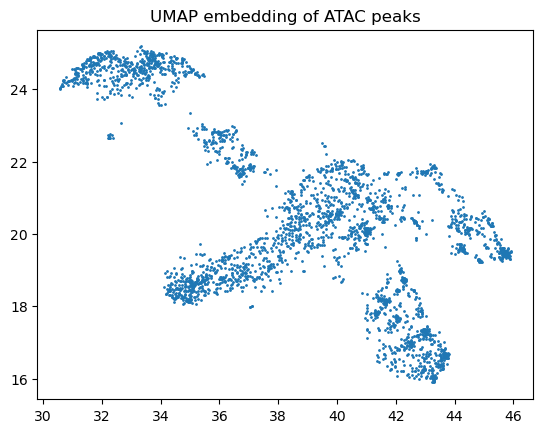

/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/matrix.annotation.test_chrX.chipseq_full.only.tsv
/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/umap.n_neighbors_15.annotation.test_chrX.chipseq_full.only.tsv

CPU times: user 13.5 s, sys: 1.03 s, total: 14.5 s
Wall time: 13 s


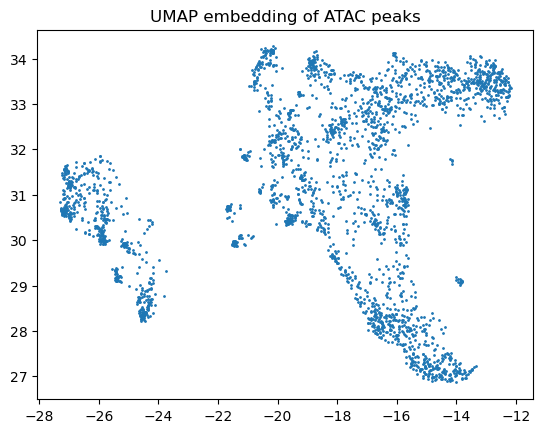

In [6]:
### loop through each matrix and perform UMAP
for txt_fname_inp, txt_fname_out in zip(lst_txt_fname_inp, lst_txt_fname_out):
    
    ### set directory
    txt_fpath_inp = os.path.join(txt_fdiry, txt_fname_inp)
    txt_fpath_out = os.path.join(txt_fdiry, txt_fname_out)
    print(txt_fpath_inp)
    print(txt_fpath_out)
    print()
    
    ### read data
    mat = pd.read_csv(txt_fpath_inp, sep="\t")
    mat = mat.set_index('Region')
    
    ### execute
    fit = umap.UMAP(metric='manhattan', n_neighbors=NUM_NEIGHBORS, n_jobs=1, random_state=123)
    mat = mat.to_numpy()
    %time res = fit.fit_transform(mat)

    ### save the results
    dat = pd.DataFrame(res, columns=["UMAP1", "UMAP2"])
    dat.to_csv(txt_fpath_out, sep="\t", index=False)

    ### show the results
    plt.scatter(res[:,0], res[:,1], s=1)
    plt.title('UMAP embedding of ATAC peaks');
    plt.show()

In [7]:
NUM_NEIGHBORS = 70
TXT_PREFIX = f"umap.n_neighbors_{NUM_NEIGHBORS}"
print(TXT_PREFIX)

umap.n_neighbors_70


In [8]:
### set directory
txt_fdiry = os.path.join(
    FD_RES,
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
lst_txt_fname_inp = [
    "matrix.annotation.test_chrX.chipseq_full.fcc.tss.tsv",
    "matrix.annotation.test_chrX.chipseq_full.only.tsv"
]
lst_txt_fname_out = [
    txt.replace("matrix", TXT_PREFIX) for txt in lst_txt_fname_inp
]

### loop through each matrix and perform UMAP
for txt_fname_inp, txt_fname_out in zip(lst_txt_fname_inp, lst_txt_fname_out):
    
    ### set directory
    txt_fpath_inp = os.path.join(txt_fdiry, txt_fname_inp)
    txt_fpath_out = os.path.join(txt_fdiry, txt_fname_out)
    print(txt_fpath_inp)
    print(txt_fpath_out)
    print()

/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/matrix.annotation.test_chrX.chipseq_full.fcc.tss.tsv
/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/umap.n_neighbors_70.annotation.test_chrX.chipseq_full.fcc.tss.tsv

/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/matrix.annotation.test_chrX.chipseq_full.only.tsv
/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/umap.n_neighbors_70.annotation.test_chrX.chipseq_full.only.tsv



/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/matrix.annotation.test_chrX.chipseq_full.fcc.tss.tsv
/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/umap.n_neighbors_70.annotation.test_chrX.chipseq_full.fcc.tss.tsv

CPU times: user 17.7 s, sys: 1.32 s, total: 19 s
Wall time: 17.1 s


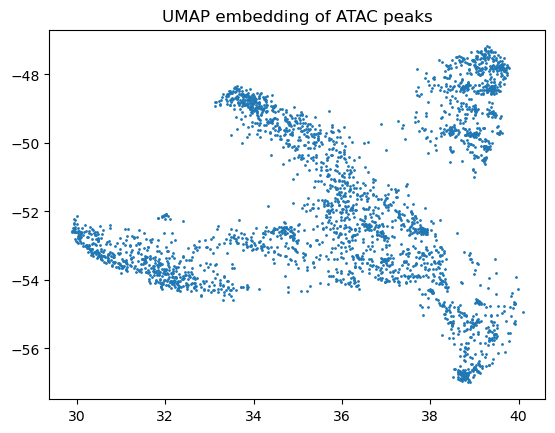

/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/matrix.annotation.test_chrX.chipseq_full.only.tsv
/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/umap.n_neighbors_70.annotation.test_chrX.chipseq_full.only.tsv

CPU times: user 17.2 s, sys: 988 ms, total: 18.2 s
Wall time: 16.6 s


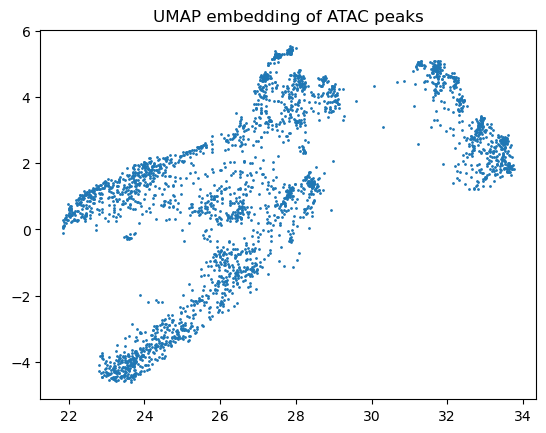

In [9]:
### loop through each matrix and perform UMAP
for txt_fname_inp, txt_fname_out in zip(lst_txt_fname_inp, lst_txt_fname_out):
    
    ### set directory
    txt_fpath_inp = os.path.join(txt_fdiry, txt_fname_inp)
    txt_fpath_out = os.path.join(txt_fdiry, txt_fname_out)
    print(txt_fpath_inp)
    print(txt_fpath_out)
    print()
    
    ### read data
    mat = pd.read_csv(txt_fpath_inp, sep="\t")
    mat = mat.set_index('Region')
    
    ### execute
    fit = umap.UMAP(metric='manhattan', n_neighbors=NUM_NEIGHBORS, n_jobs=1, random_state=123)
    mat = mat.to_numpy()
    %time res = fit.fit_transform(mat)

    ### save the results
    dat = pd.DataFrame(res, columns=["UMAP1", "UMAP2"])
    dat.to_csv(txt_fpath_out, sep="\t", index=False)

    ### show the results
    plt.scatter(res[:,0], res[:,1], s=1)
    plt.title('UMAP embedding of ATAC peaks');
    plt.show()

## Import data

In [13]:
lst_txt_fname_inp = [
    "matrix.annotation.test_chrX.chipseq_full.fcc.tss.tsv",
    "matrix.annotation.test_chrX.chipseq_full.only.tsv"
]
lst_txt_fname_out = [
    txt.replace("matrix", "umap") for txt in lst_txt_fname_inp
]

print(lst_txt_fname_inp)
print(lst_txt_fname_out)

['matrix.annotation.test_chrX.chipseq_full.fcc.tss.tsv', 'matrix.annotation.test_chrX.chipseq_full.only.tsv']
['umap.annotation.test_chrX.chipseq_full.fcc.tss.tsv', 'umap.annotation.test_chrX.chipseq_full.only.tsv']


In [24]:
### set directory
txt_fdiry = os.path.join(
    FD_RES,
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
lst_txt_fname_inp = [
    "matrix.annotation.test_chrX.chipseq_full.fcc.tss.tsv",
    "matrix.annotation.test_chrX.chipseq_full.only.tsv"
]
lst_txt_fname_out = [
    txt.replace("matrix", "umap") for txt in lst_txt_fname_inp
]

### loop through each matrix and perform UMAP
for txt_fname_inp, txt_fname_out in zip(lst_txt_fname_inp, lst_txt_fname_out):
    
    ### set directory
    txt_fpath_inp = os.path.join(txt_fdiry, txt_fname_inp)
    txt_fpath_out = os.path.join(txt_fdiry, txt_fname_out)
    print(txt_fpath_inp)
    print(txt_fpath_out)
    
    ### read data
    mat = pd.read_csv(txt_fpath_inp, sep="\t")
    mat = mat.set_index('Region')
    
    ### execute
    fit = umap.UMAP(metric='manhattan', n_neighbors=70, n_jobs=1, random_state=123)
    mat = mat.to_numpy()
    %time res = fit.fit_transform(mat)

    ### save the results
    dat = pd.DataFrame(res, columns=["U1", "U2"])
    dat.to_csv(txt_fpath_out, sep="\t", index=False)

/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/matrix.annotation.test_chrX.chipseq_full.fcc.tss.tsv
/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/umap.annotation.test_chrX.chipseq_full.fcc.tss.tsv
CPU times: user 17.6 s, sys: 952 ms, total: 18.6 s
Wall time: 17.2 s
/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/matrix.annotation.test_chrX.chipseq_full.only.tsv
/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/umap.annotation.test_chrX.chipseq_full.only.tsv
CPU times: user 17.4 s, sys: 969 ms, total: 18.4 s
Wall time: 17 s


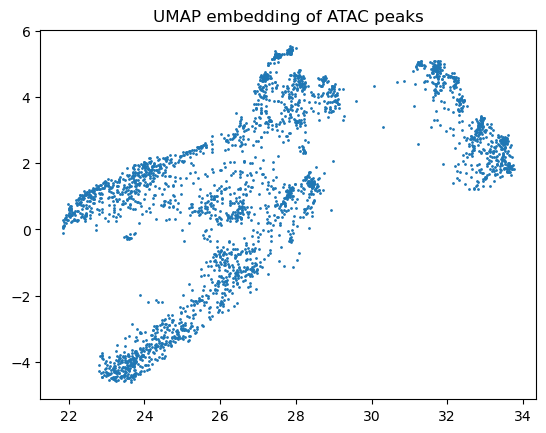

In [25]:
plt.scatter(res[:,0], res[:,1], s=1)
plt.title('UMAP embedding of ATAC peaks');

## Import data

/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/matrix.annotation.test_chrX.chipseq_full.fcc.tss.tsv
/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/umap.annotation.test_chrX.chipseq_full.fcc.tss.tsv



OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


CPU times: user 21.9 s, sys: 1.16 s, total: 23.1 s
Wall time: 21.6 s


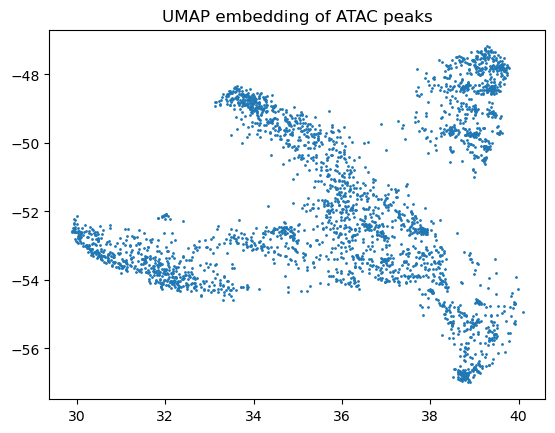

/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/matrix.annotation.test_chrX.chipseq_full.only.tsv
/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/umap.annotation.test_chrX.chipseq_full.only.tsv

CPU times: user 17.1 s, sys: 999 ms, total: 18.1 s
Wall time: 16.7 s


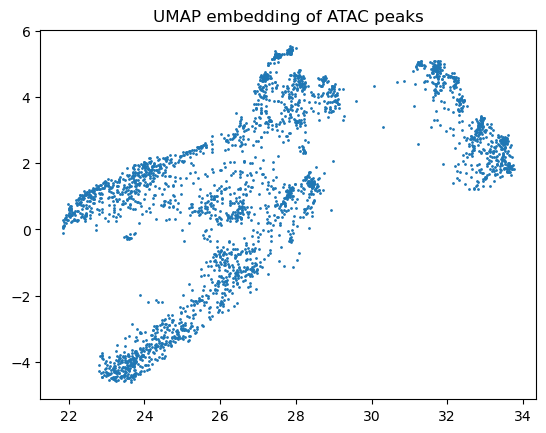

In [4]:
### set directory
txt_fdiry = os.path.join(
    FD_RES,
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
lst_txt_fname_inp = [
    "matrix.annotation.test_chrX.chipseq_full.fcc.tss.tsv",
    "matrix.annotation.test_chrX.chipseq_full.only.tsv"
]
lst_txt_fname_out = [
    txt.replace("matrix", "umap") for txt in lst_txt_fname_inp
]

### loop through each matrix and perform UMAP
for txt_fname_inp, txt_fname_out in zip(lst_txt_fname_inp, lst_txt_fname_out):
    
    ### set directory
    txt_fpath_inp = os.path.join(txt_fdiry, txt_fname_inp)
    txt_fpath_out = os.path.join(txt_fdiry, txt_fname_out)
    print(txt_fpath_inp)
    print(txt_fpath_out)
    print("")
    ### read data
    mat = pd.read_csv(txt_fpath_inp, sep="\t")
    mat = mat.set_index('Region')
    
    ### execute
    fit = umap.UMAP(metric='manhattan', n_neighbors=70, n_jobs=1, random_state=123)
    mat = mat.to_numpy()
    %time res = fit.fit_transform(mat)

    ### save the results
    dat = pd.DataFrame(res, columns=["UMAP1", "UMAP2"])
    
    plt.scatter(res[:,0], res[:,1], s=1)
    plt.title('UMAP embedding of ATAC peaks');
    plt.show()